In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data_config = {"F":100,"ionoNharm":6,"domainLengthInF":3.6,"maxN_PS":15,"PoissonLambda_amplPS":5,"numPsiSamples":7,"xi":0.5,"relNoiseCoeff":0.05,"addSpeckleCoeff":0.05,"minScattererRadius":1,"ionoAmplOverPi":4,"F_to_lmax":1.5,"windowType":"rect","sumType":"trapz"}

df = pd.read_csv("/home/houtlaw/iono-net/model/training_losses_single.csv")

df.head()

,Epoch,Training Loss,Test Loss
0,266,25.199938,27.078644
1,1,25.516079,27.433233
2,267,25.149517,27.112652
3,2,25.519178,27.455437
4,3,25.517320,27.439660


Text(0.5, 1.0, 'Training and Validation Loss across Epochs (L2 Psi Coeffs)\n relNoiseCoeff: 0.05, addSpeckleCoeff: 0.05, ionoAmplOverPi: 4')

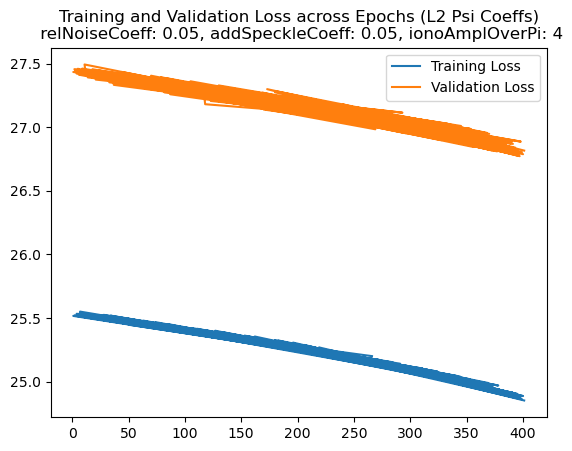

In [8]:
plt.plot(df["Epoch"], df["Training Loss"], label = "Training Loss")
plt.plot(df["Epoch"], df["Test Loss"], label = "Validation Loss")
plt.legend()
plt.title("Training and Validation Loss across Epochs (L2 Psi Coeffs)\n relNoiseCoeff: 0.05, addSpeckleCoeff: 0.05, ionoAmplOverPi: 4")